## El juego de la vida

Es un autómata celular diseñado por el matemático británico John Horton Conway en 1970.

Hizo su primera aparición pública en el número de octubre de 1970 de la revista Scientific American, en la columna de juegos matemáticos de Martin Gardner. Desde un punto de vista teórico, es interesante porque es equivalente a una máquina universal de Turing, es decir, todo lo que se puede computar algorítmicamente se puede computar en el juego de la vida.
Desde su publicación, ha atraído mucho interés debido a la gran variabilidad de la evolución de los patrones. Se considera que la vida es un buen ejemplo de emergencia y auto organización. Es interesante para los científicos, matemáticos, economistas y otros observar cómo patrones complejos pueden provenir de la implementación de reglas muy sencillas.

### Formulación del problema

En este caso se implementará las vocales en cual permitirá identificar el número de células vivas y muertas después de la implantación con un límite finito de iteración

### Resultados Esperados

Obtener de la simulación es conocer la relación que existe entre la complejidad de cómo se graficó la vocal y las células que quedan vivas 

### Plan de experimentación 

En este caso se implantará las 5 vocales y el usuario podrá implementar las iteraciones que deseen hacer entre las distintas vocales.

### Tiempo Disponible

Tendremso dos semanas para realizar la simulación

### Variables de Interés

* Numero de células vivas 
* Numero de células muertas
* Numero de iteraciones
* Tamaño de las vocales


In [155]:
from collections import Counter

def next_generation(world):
    "The set of live cells in the next generation."
    possible_cells = counts = neighbor_counts(world)
    return {cell for cell in possible_cells
            if (counts[cell] == 3) 
            or (counts[cell] == 2 and cell in world)}

def neighbor_counts(world):
    "A {cell: int} counter of the number of live neighbors for each cell that has neighbors."
    return Counter(nb for cell in world 
                      for nb in neighbors(cell))

def neighbors(cell):
    "All 8 adjacent neighbors of cell."
    (x, y) = cell
    return [(x-1, y-1), (x, y-1), (x+1, y-1), 
            (x-1, y),             (x+1, y), 
            (x-1, y+1), (x, y+1), (x+1, y+1)]

# Matriz 

#### Letra A

world = {(2, 7), (3, 6), (4, 5), (5, 4), (4, 6), (5, 6), (6, 6), (6, 5), (7, 6), (8, 7)}

#### Letra E

world = {(4, 3), (5, 3), (6, 3), (7, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (5, 6), (6, 6)}

#### Letra I

world = {(4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 9), (4, 9), (5, 9), (7, 9), (8, 9), (6, 8)}

#### Letra O

world = {(5, 3), (6, 3), (4, 4), (4, 6), (4, 7), (4, 8), (5, 9), (6, 9), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (4, 4), (4, 5)}

#### Letra U

world = {(4, 4), (4, 6), (4, 7), (4, 8), (5, 9), (6, 9), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (4, 4), (4, 5)}

#### Letra H

world = {(4, 3), (7, 3), (4, 4), (4, 6), (4, 7), (4, 8), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (4, 4), (4, 5), (4, 9), (7, 9), (5, 6), (6, 6)}


In [162]:
world = {(4, 3), (5, 3), (6, 3), (7, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (5, 6), (6, 6)}
next_generation(world)

{(3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 2),
 (5, 3),
 (5, 9),
 (5, 10),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 8),
 (6, 9),
 (6, 10)}

In [163]:
def run(world, n):
    "Run the world for n generations. No display; just return the nth generation."
    for g in range(n):
        world = next_generation(world)
    return world

In [164]:
run(world, 100)

{(2, 5), (2, 6), (2, 7), (6, 2), (6, 3), (6, 4), (6, 8), (6, 9), (6, 10)}

In [165]:
import time
from IPython.display import clear_output, display_html

LIVE  = '@'
EMPTY = '.'
PAD   = ' '

def display_run(world, n=10, Xs=range(10), Ys=range(10), pause=0.1):
    "Step and display the world for the given number of generations."
    for g in range(n + 1):
        clear_output()
        display_html('Numero de Iteraciones {}, Celulas Vivas {}\n{}'
                     .format(g, len(world), pre(picture(world, Xs, Ys))), 
                     raw=True)
        time.sleep(pause)
        world = next_generation(world)
        
def pre(text): return '<pre>' + text + '</pre>'
        
def picture(world, Xs, Ys):
    "Return a picture: a grid of characters representing the cells in this window."
    def row(y): return PAD.join(LIVE if (x, y) in world else EMPTY for x in Xs)
    return '\n'.join(row(y) for y in Ys)

In [166]:
print(picture(world, range(15), range(15)))

. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . @ @ @ @ . . . . . . .
. . . . @ . . . . . . . . . .
. . . . @ . . . . . . . . . .
. . . . @ @ @ . . . . . . . .
. . . . @ . . . . . . . . . .
. . . . @ . . . . . . . . . .
. . . . @ @ @ @ . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .


In [173]:
display_run(world, 20, range(15), range(15))

Numero de Iteraciones 20, Celulas Vivas 9
 . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . @ . . . . . . . .
. . . . . . @ . . . . . . . .
. . . . . . @ . . . . . . . .
. . @ . . . . . . . . . . . .
. . @ . . . . . . . . . . . .
. . @ . . . . . . . . . . . .
. . . . . . @ . . . . . . . .
. . . . . . @ . . . . . . . .
. . . . . . @ . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .

# Resultados 

#### Letra A

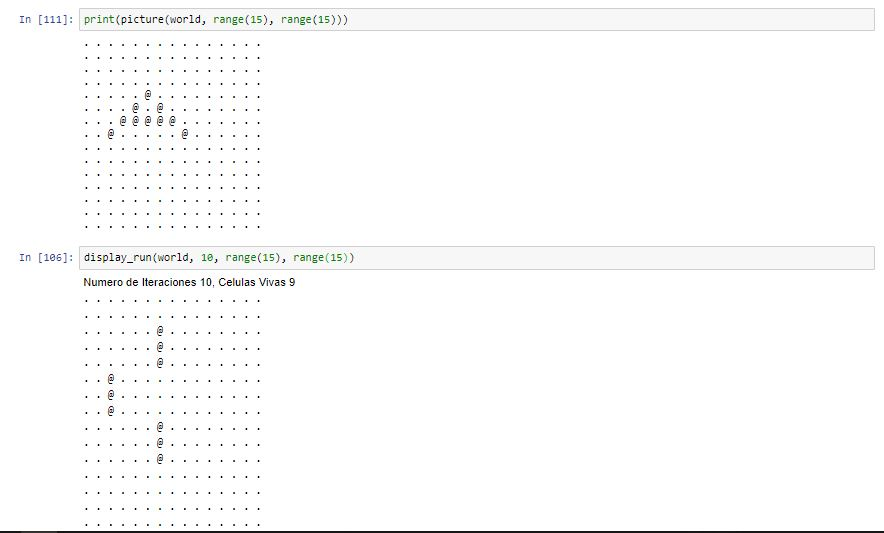

#### Letra E

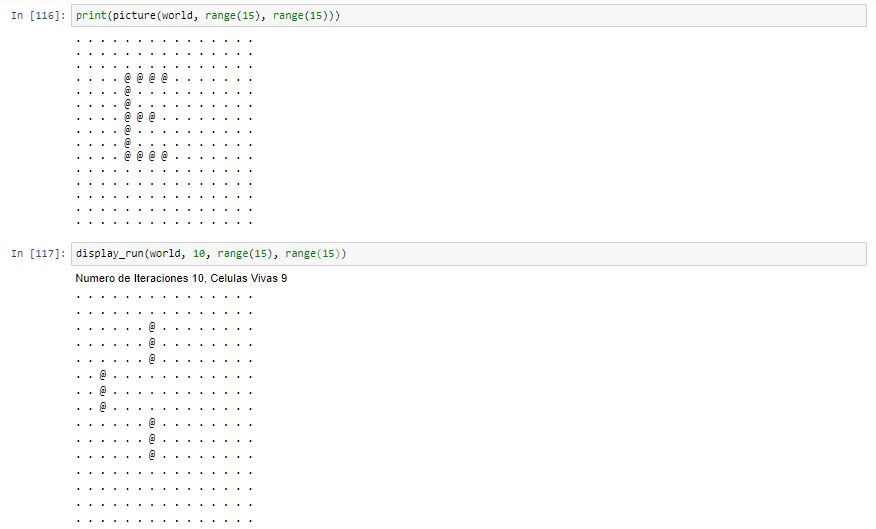

#### Letra I

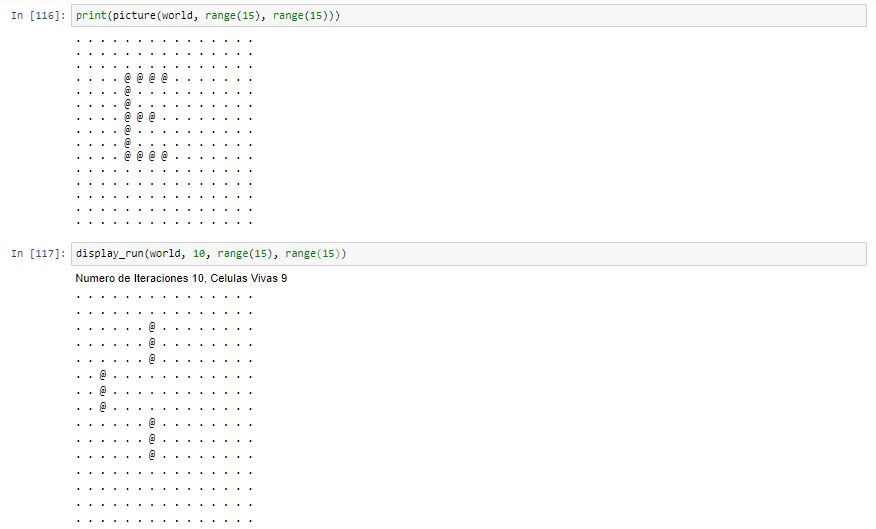

#### Letra O

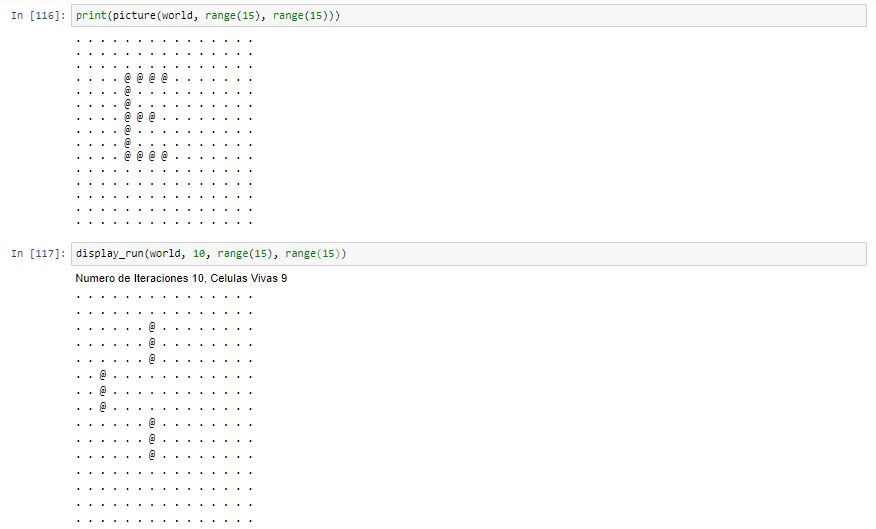

#### Letra U

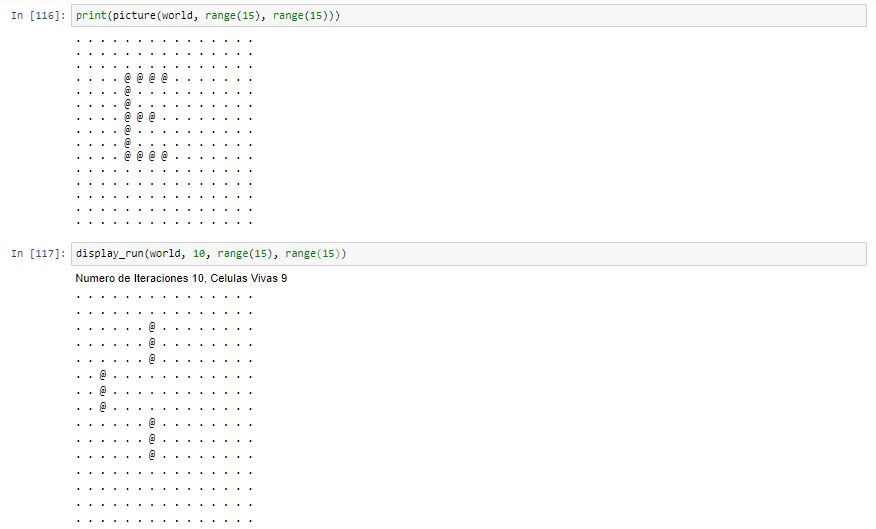

#### Letra H

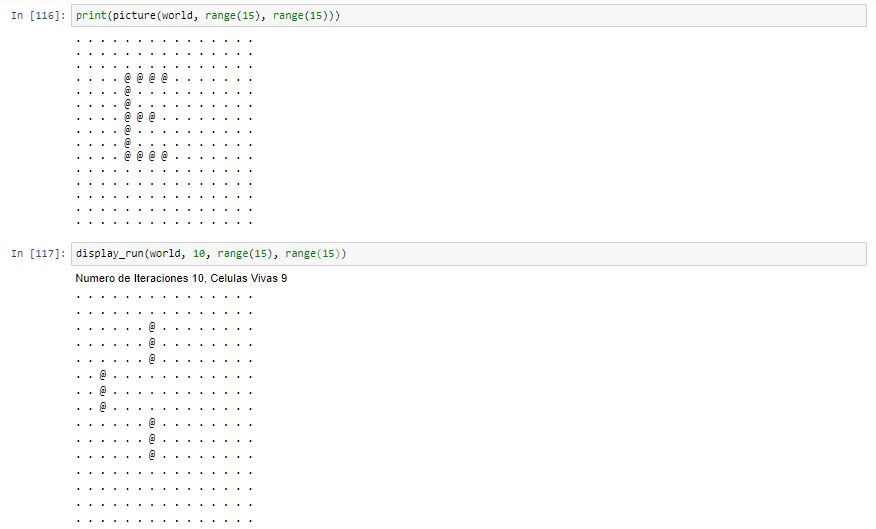